# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report,roc_auc_score
import time
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier



In [7]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [9]:
#Lets review the data. We are looking for nulls, empty fields, empty columns, unique values etc. 
df.describe()
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no null values, for the most part data looks good.


In [10]:
# rename column 'y' to 'term deposit' to make sense of the values in the column
df.rename(columns={'y': 'term deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The data is from a Portuguese bank, that used its own contact-center to do directed marketing campaigns. They ran 17 campaigns to get as clean data as possible to understand if a Contact/lead would sign up for a long term deposit. A lot of attributes were stored for each contact/lead that signed up as well as the ones that did not sign up. The goal is to find the best machine learning model that can help predict the most accurate outcome of a contact/lead signing up for the long term deposit or not.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Text(0.5, 1.0, 'Top 5 Job Categories')

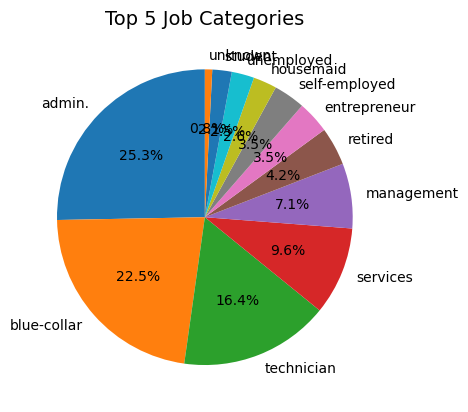

In [12]:
# Let first visualize the data to see how data is spread and correlations between different columns and Term Deposit (which is our target)

#Pie chart for job distribution
job_counts = df['job'].value_counts()
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Job Categories', fontsize=14)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'basic.6y'),
  Text(2, 0, 'basic.9y'),
  Text(3, 0, 'high.school'),
  Text(4, 0, 'illiterate'),
  Text(5, 0, 'professional.course'),
  Text(6, 0, 'university.degree'),
  Text(7, 0, 'unknown')])

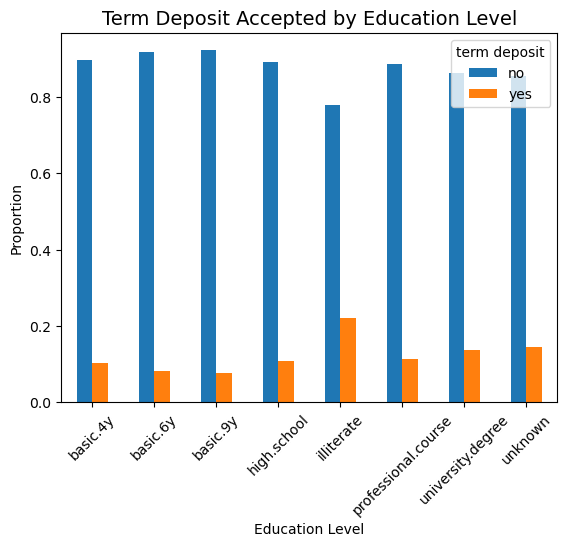

In [13]:
# Education vs. Term Deposit Accepted
education_y = pd.crosstab(df['education'], df['term deposit'], normalize='index')
education_y.plot(kind='bar')
plt.title('Term Deposit Accepted by Education Level', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'housemaid'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'services'),
  Text(8, 0, 'student'),
  Text(9, 0, 'technician'),
  Text(10, 0, 'unemployed'),
  Text(11, 0, 'unknown')])

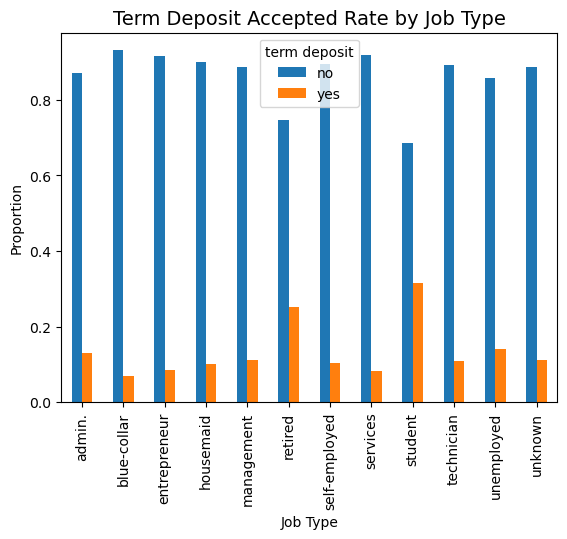

In [14]:
# Job vs. Term Deposit Accepted
job_y = pd.crosstab(df['job'], df['term deposit'], normalize='index')
job_y.plot(kind='bar')
plt.title('Term Deposit Accepted Rate by Job Type', fontsize=14)
plt.xlabel('Job Type')
plt.ylabel('Proportion')
plt.xticks(rotation=90)


Text(0, 0.5, 'Count')

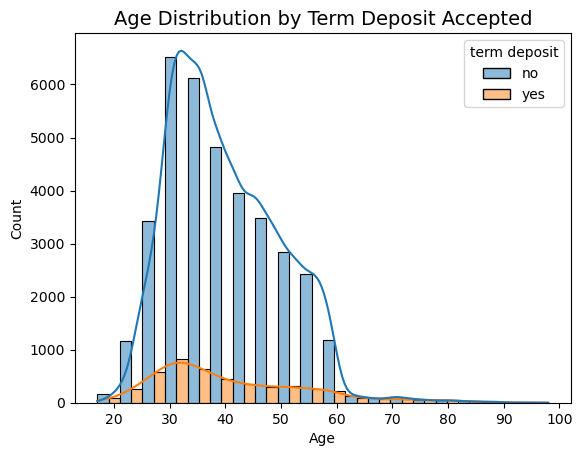

In [15]:

# Age vs. Term Deposit Accepted
sns.histplot(data=df, x='age', hue='term deposit', multiple='dodge', bins=20, kde=True)
plt.title('Age Distribution by Term Deposit Accepted', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

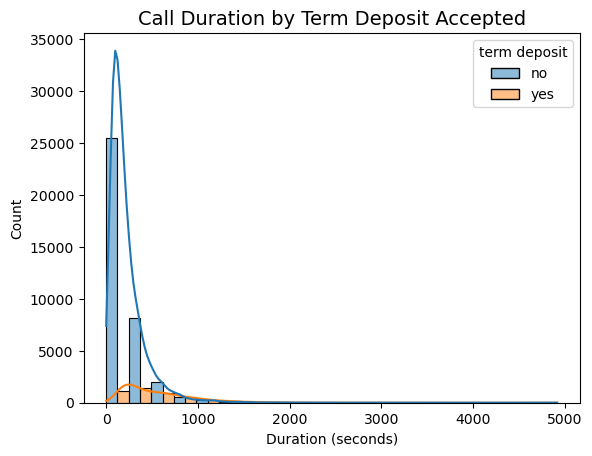

In [16]:
# Duration vs. Term Deposit Accepted
sns.histplot(data=df, x='duration', hue='term deposit', multiple='dodge', bins=20, kde=True)
plt.title('Call Duration by Term Deposit Accepted', fontsize=14)
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')

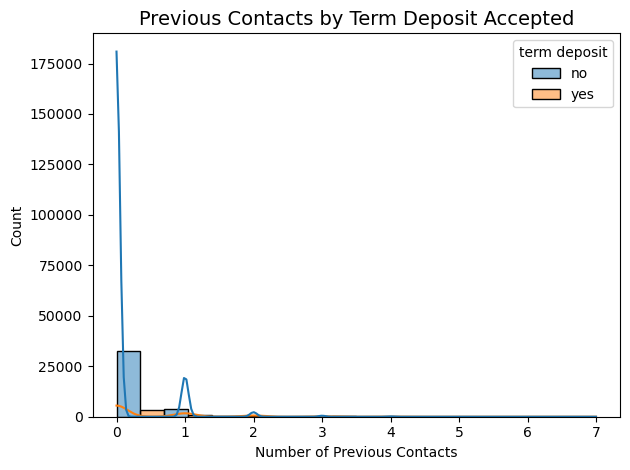

In [17]:
# Previous vs. Term Deposit Accepted
sns.histplot(data=df, x='previous', hue='term deposit', multiple='dodge', bins=10, kde=True)
plt.title('Previous Contacts by Term Deposit Accepted', fontsize=14)
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('bank_data_numerical_correlations.png', dpi=300)
plt.show()



Text(0, 0.5, 'Proportion')

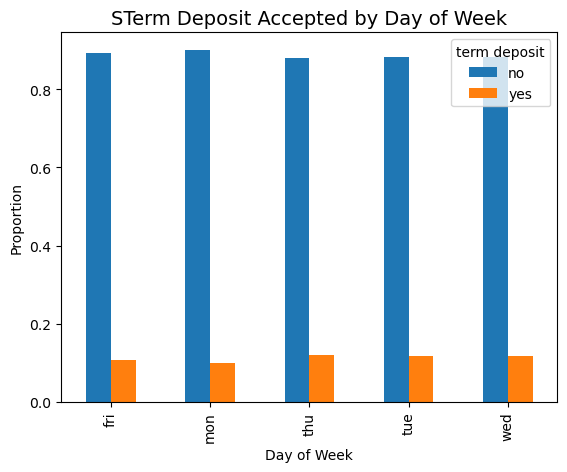

In [18]:
# Day of week vs. Term Deposit Accepted
day_y = pd.crosstab(df['day_of_week'], df['term deposit'], normalize='index')
day_y.plot(kind='bar')
plt.title('STerm Deposit Accepted by Day of Week', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Proportion')



Text(0, 0.5, 'Proportion')

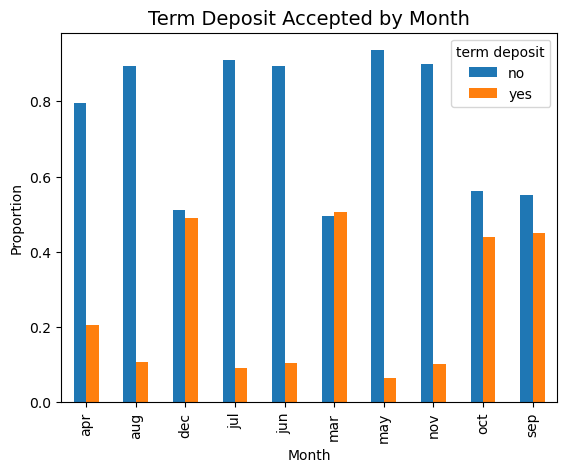

In [19]:
# Month vs. Term Deposit Accepted
month_y = pd.crosstab(df['month'], df['term deposit'], normalize='index')
month_y.plot(kind='bar')
plt.title('Term Deposit Accepted by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Proportion')

In [20]:
# Identify different types of features
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
date_features = df.select_dtypes(include=['datetime']).columns.tolist()

print(f"Numeric features: {numeric_features}")
print(f"Categorical features: {categorical_features}")
print(f"Date features: {date_features}")

# Feature engineering based on data types
def engineer_features(df):
    df_featured = df.copy()
    
    # Process categorical features
    for col in categorical_features:
        # Check cardinality
        cardinality = df_featured[col].nunique()
        
        # check for cardinality so that we can encode.
        if cardinality > 10:
            print(f"Cardinality {col}: {cardinality} unique values")
    
    # Process date features
    for col in date_features:
        # Extract useful components from date
        if not df_featured[col].empty:
            df_featured[f"{col}_year"] = df_featured[col].dt.year
            df_featured[f"{col}_month"] = df_featured[col].dt.month
            df_featured[f"{col}_day"] = df_featured[col].dt.day
            df_featured[f"{col}_dayofweek"] = df_featured[col].dt.dayofweek
            
            print(f"Created date components from {col}")
    return df_featured

# Apply feature engineering
df_featured = engineer_features(df)

# Check engineered dataset
print(f"Shape: {df_featured.shape}")
display(df_featured.head())

Numeric features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'term deposit']
Date features: []
Cardinality job: 12 unique values
Shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [21]:
#Now we will create pipelines, split data, one-hot encode and use standardScalar on the features.

# storing in a variable to keep it easy to track
target_column = 'term deposit'  

# Separate features and target
X = df_featured.drop(columns=[target_column])
y = df_featured[target_column]

# Convert 'yes'/'no' to 1/0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# 'Yes' and 'No' will now convert to 1 and 0

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Get feature names after removing target
numeric_features_model = [col for col in numeric_features if col != target_column]
categorical_features_model = [col for col in categorical_features if col != target_column]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_model),
        ('cat', categorical_transformer, categorical_features_model)
    ])

# Check the feature types being used
print(f"Numeric features for model: {numeric_features_model}")
print(f"Categorical features for model: {categorical_features_model}")

Features shape: (41188, 20)
Target shape: (41188,)
Training set: 32950 samples
Test set: 8238 samples
Numeric features for model: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical features for model: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [24]:
dummy_clf = ''
dummyclf_start_time = ''
dummyclf_end_time = ''
baseline_score = ''

dummyclf_start_time = time.time()
dummy_clf = DummyClassifier().fit(X_train, y_train)
dummyclf_end_time = time.time()

baseline_score = dummy_clf.score(X_test, y_test)

print('Baseline Score: ', baseline_score,'\nStart Time', dummyclf_start_time, '\nEnd Time: ', dummyclf_end_time )


Baseline Score:  0.8865015780529255 
Start Time 1749073260.221148 
End Time:  1749073260.223155


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [25]:
# Logistic Regression
lr_baseline_score = ''

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_pipeline.predict(X_test)
if hasattr(lr_pipeline, 'predict_proba'):
    y_prob_lr = lr_pipeline.predict_proba(X_test)

lr_baseline_score = lr_pipeline.score(X_test, y_test)

print('LR Baseline Score: ',lr_baseline_score , 'vs Dummy Baseline Score: ',baseline_score)

LR Baseline Score:  0.9112648701141054 vs Dummy Baseline Score:  0.8865015780529255


### Problem 9: Score the Model

What is the accuracy of your model?

Logistic Regression Results:
---------------------------
Accuracy: 0.9112648701141054

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



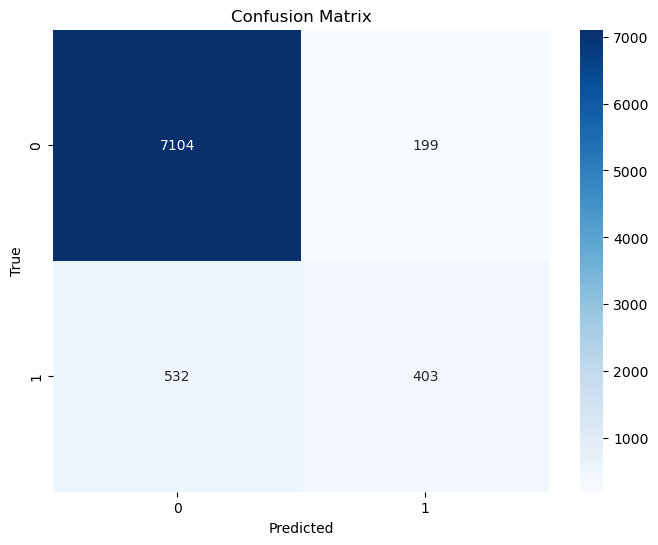

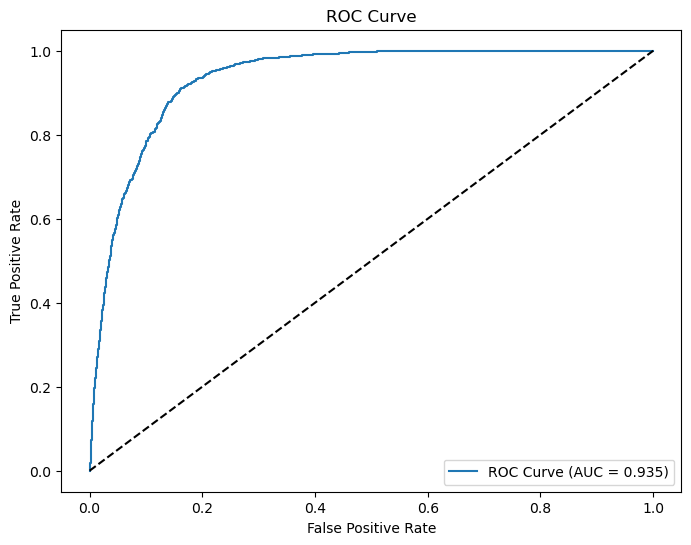

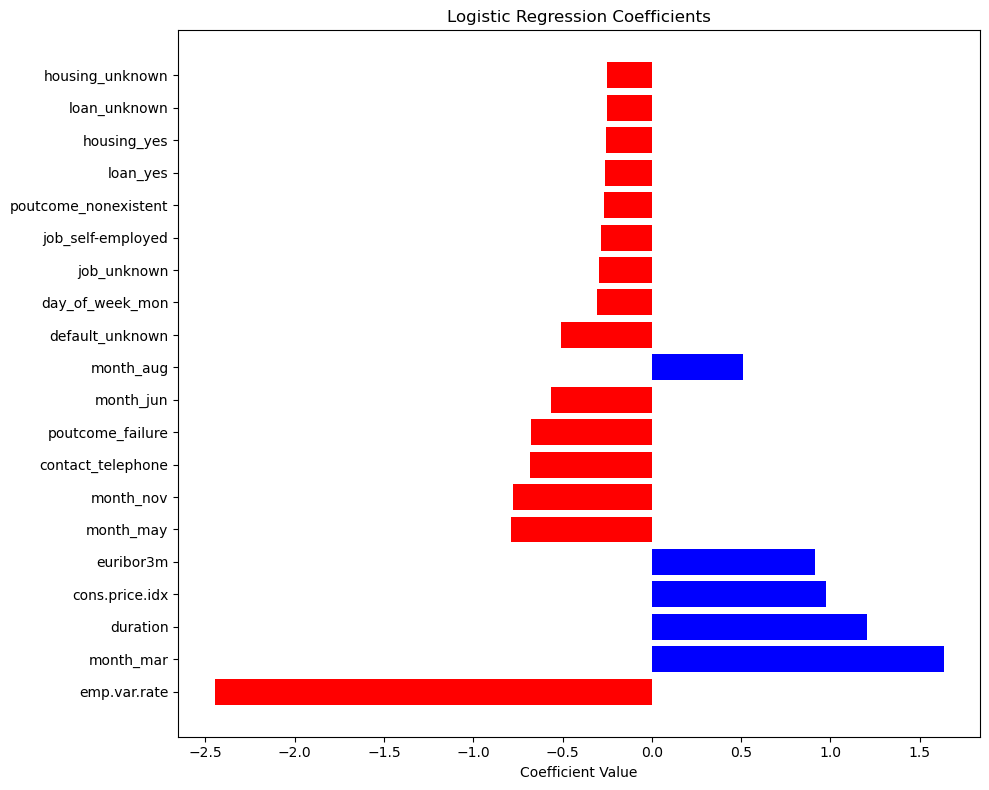

Cross-validation scores: [0.89354212 0.83612527 0.87897548 0.6204929  0.61490834]
Mean CV score: 0.7688 (±0.1248)


In [26]:
# Evaluate the model
print("Logistic Regression Results:")
print("---------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC curve if binary classification
if len(np.unique(y)) == 2 and hasattr(lr_pipeline, 'predict_proba'):
    plt.figure(figsize=(8, 6))
    fpr, tpr, _ = roc_curve(y_test, y_prob_lr[:, 1])
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_lr[:, 1]):.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Feature coefficients (for interpretation)
if hasattr(lr_pipeline.named_steps['classifier'], 'coef_'):
    # Get feature names (considering one-hot encoding)
    feature_names = []
    for name, transformer, columns in preprocessor.transformers_:
        if hasattr(transformer, 'get_feature_names_out'):
            feature_names.extend(transformer.get_feature_names_out(columns))
        else:
            feature_names.extend(columns)
    
    # Get coefficients
    coefficients = lr_pipeline.named_steps['classifier'].coef_[0]
    
    # Plot top features
    if len(feature_names) == len(coefficients):
        # Sort by absolute value
        indices = np.argsort(np.abs(coefficients))[::-1]
        top_n = min(20, len(indices))
        
        plt.figure(figsize=(10, 8))
        colors = ['red' if c < 0 else 'blue' for c in coefficients[indices[:top_n]]]
        plt.barh(range(top_n), coefficients[indices[:top_n]], align='center', color=colors)
        plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]])
        plt.xlabel('Coefficient Value')
        plt.title('Logistic Regression Coefficients')
        plt.tight_layout()
        plt.show()
    else:
        print("Warning: Feature names don't match coefficients, can't plot feature importance")

# Cross-validation
cv_scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")


Linear Regression shows high accuracy as show on the ROC curve suggesting there are more true positives, indicating the model can more accurately predict the outcome.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [27]:
results = []

models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7, 9]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [2, 5, 10]})
}

#Model Training and Evaluation For Loop
for name, (model, params) in models.items():
    print(f"Training and evaluating: {name}") 
    try:
        # Create a pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            (name, model)
        ])

        # Perform grid search
        grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1, error_score='raise')

        # Fit the model and time it
        start_time = time.time()
        grid_search.fit(X_train, y_train)
        fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

        # Get the best estimator
        best_model = grid_search.best_estimator_

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate scores
        train_score = best_model.score(X_train, y_train)
        test_score = best_model.score(X_test, y_test)

        # Calculate accuracy
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Append the results
        results.append([name, train_score, test_score, train_accuracy, test_accuracy, fit_time])

    except Exception as e:
        print(f"Error training {name}: {e}")  # Print the error for debugging
        continue

#Create and Save Results DataFrame
try:
    # Create the results DataFrame
    results_df = pd.DataFrame(results, columns=['model', 'training score', 'testing score', 'training accuracy', 'testing accuracy', 'run time'])
    results_df.set_index('model', inplace=True)

    # Save to JSON
    results_df.to_json('data/model_results.json')  # Ensure 'data' directory exists

    print("Results saved to data/model_results.json")

except Exception as e:
    print(f"Error saving results to JSON: {e}")


Training and evaluating: knn
Training and evaluating: logisticregression
Training and evaluating: svc
Training and evaluating: decisiontreeclassifier
Results saved to data/model_results.json


In [30]:
df = pd.read_json('data/model_results.json')
df

,training score,testing score,training accuracy,testing accuracy,run time
knn,0.919788,0.903253,0.919788,0.903253,7.546379
logisticregression,0.911806,0.911386,0.911806,0.911386,7.645446
svc,0.922671,0.911750,0.922671,0.911750,139.959505
decisiontreeclassifier,0.917420,0.915028,0.917420,0.915028,0.928269


Interestingly Decision Tree seems like the best option given high accuracy and least about of runtime

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

 Question - should we keep the gender feature? Why or why not?

 Answer: Intuitively We should keep the gender column because that will help remove any biases. For example, Gender, education, job may all have an affect on the outcome of the prediction and accuracy, specially if we go by Decision tree Classifier that it might modify the prediction. We will have to test it out by removing some of these columns and checking the accuracy and compare.

Question: HYPERPARAMETER Tuninig
Answer : Problem 10 above was done considering multiple parameters options:
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7, 9]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [2, 5, 10]})
}

For KNN - 3,5,7,9
For LR - 0.1,1,10
For SVC - 0.1,1,10
For DT - 2,5,10

We can give it a bigger or a different range and rerun the code and the accuracy will remain the same as we are lookign at the best paramter already. Running the code below again for different parameter range (removing SVM as it takes the most amoutn of time) just to test one more time.

In [33]:
results = []

models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [2,3,4,5,6,7,8,9,10]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1,2, 10]}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [2,3,4,5,6,7,8,9]})
}

#Model Training and Evaluation For Loop
for name, (model, params) in models.items():
    print(f"Training and evaluating: {name}") 
    try:
        # Create a pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            (name, model)
        ])

        # Perform grid search
        grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1, error_score='raise')

        # Fit the model and time it
        start_time = time.time()
        grid_search.fit(X_train, y_train)
        fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

        # Get the best estimator
        best_model = grid_search.best_estimator_

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate scores
        train_score = best_model.score(X_train, y_train)
        test_score = best_model.score(X_test, y_test)

        # Calculate accuracy
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Append the results
        results.append([name, train_score, test_score, train_accuracy, test_accuracy, fit_time])

    except Exception as e:
        print(f"Error training {name}: {e}")  # Print the error for debugging
        continue

#Create and Save Results DataFrame
try:
    # Create the results DataFrame
    results_df = pd.DataFrame(results, columns=['model', 'training score', 'testing score', 'training accuracy', 'testing accuracy', 'run time'])
    results_df.set_index('model', inplace=True)

    # Save to JSON
    results_df.to_json('data/model_results.json')  # Ensure 'data' directory exists

    print("Results saved to data/model_results.json")

except Exception as e:
    print(f"Error saving results to JSON: {e}")

Training and evaluating: knn
Training and evaluating: logisticregression
Training and evaluating: decisiontreeclassifier
Results saved to data/model_results.json


In [34]:
df = pd.read_json('data/model_results.json')
df

,training score,testing score,training accuracy,testing accuracy,run time
knn,0.919788,0.903253,0.919788,0.903253,2.285170
logisticregression,0.911806,0.911386,0.911806,0.911386,0.649625
decisiontreeclassifier,0.917420,0.915028,0.917420,0.915028,0.427627
